# Data Preprocessing Tools

Three steps that should be done when preprocessing the data: missing data, categorical data transformation, and feature scaler

* always do feature selection after the train test split
* please don't do feature selection on categorical data (a.k.a one-hot-encoding values)
* MinMaxScaler when most of the data are normal distributed; StandScaler when almost all kinds of data

## Taking care of missing data

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [0]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding categorical data

### Encoding the Independent Variable

In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# the transformers argument should be in a list and consist of tuple, 'encoder is needed', the second one is the encoder you're using
# the third one is the index in the X that you want to transform
# the remainder is what you're going to do to the rest column, can choose from 'drop', 'passthrough'
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [0]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### Encoding the Dependent Variable

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [0]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


## Splitting the dataset into the Training set and Test set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [0]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [0]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [0]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [0]:
print(y_test)

[0 1]


## Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [0]:
print(X_train)

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]


In [0]:
print(X_test)

[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]


## Multi Linear Regression
* the linear_model with help you to solve the dummy variable trap(which is that if you don't drop the first column when using one hot encoder, the last dummy variable will be colineary to other variables)
* you also don't need to do the backward elimination for the model cuz it is also built in the model

In [ ]:
regressor = LinearRegression()
# print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]]))
# print(regressor.coef_)
# print(regressor.intercept_)

## Polynomial Linear Regression
* if you only have single X independent variable, you need to reshape the array to vertical shape of vector (x,1), otherwise the machine learning classes won't take it; y, on the other hand, won't need to be reshaped.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# degree =2 means the biggest power is 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
linear = LinearRegression()
linear.fit(X_poly, y_train)

## Support Vector Regression
* feature scaling needed: when an algorithm has implicit function to the dependent variable, then you should adopt feature scaling, when it's a linear regression model with coefficients to compensate the difference of scale, then you can leave it. You don't want the independent variables with smaller scale to be neglected in the implicit function.
* if you also need to scale Y, you should use a different standard scaler, because a standard scaler is to use the mean and std to transform it, you couldn't use the same scaler for X & y.
* make sure to reshape y into a vertical vector (x,1) in order to fit into the StandardScaler, the same reason as the machine learning classes, that they aren't able to take horizontal vector (1,x) when fitting the data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y=StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

## Decision Tree and Random Forest
* you don't need to apply feature scaling to decision tree and random forest, because it is split by successive leafs
* it is a better predictor for non-single variable datas

In [ ]:
# visualizing

# method1
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# method2
import seaborn as sns
%matplotlib inline

p, ax = plt.subplots()
ax.scatter(X, y, color='r')
ax.plot(X_grid, regressor.predict(X_grid), color = 'blue')
ax.set_title('Truth or Bluff (Decision Tree Regression)')
ax.set_xlabel('Position level')
ax.set_ylabel('Salary')

# method3
sns.scatterplot(x=X, y=y, color='red')
sns.lineplot(x=df_draw['X'], y=df_draw['y'], color='b')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')

## Regression Model Selection
* or use adjusted r-square: because r-square can only be better, as if the model knows that adding a new variable will decrease the r-square, it will simply allocate a 0 coefficient to that new variable. That's why adjusted r-square was invented, to punish too many variables in a regression model

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

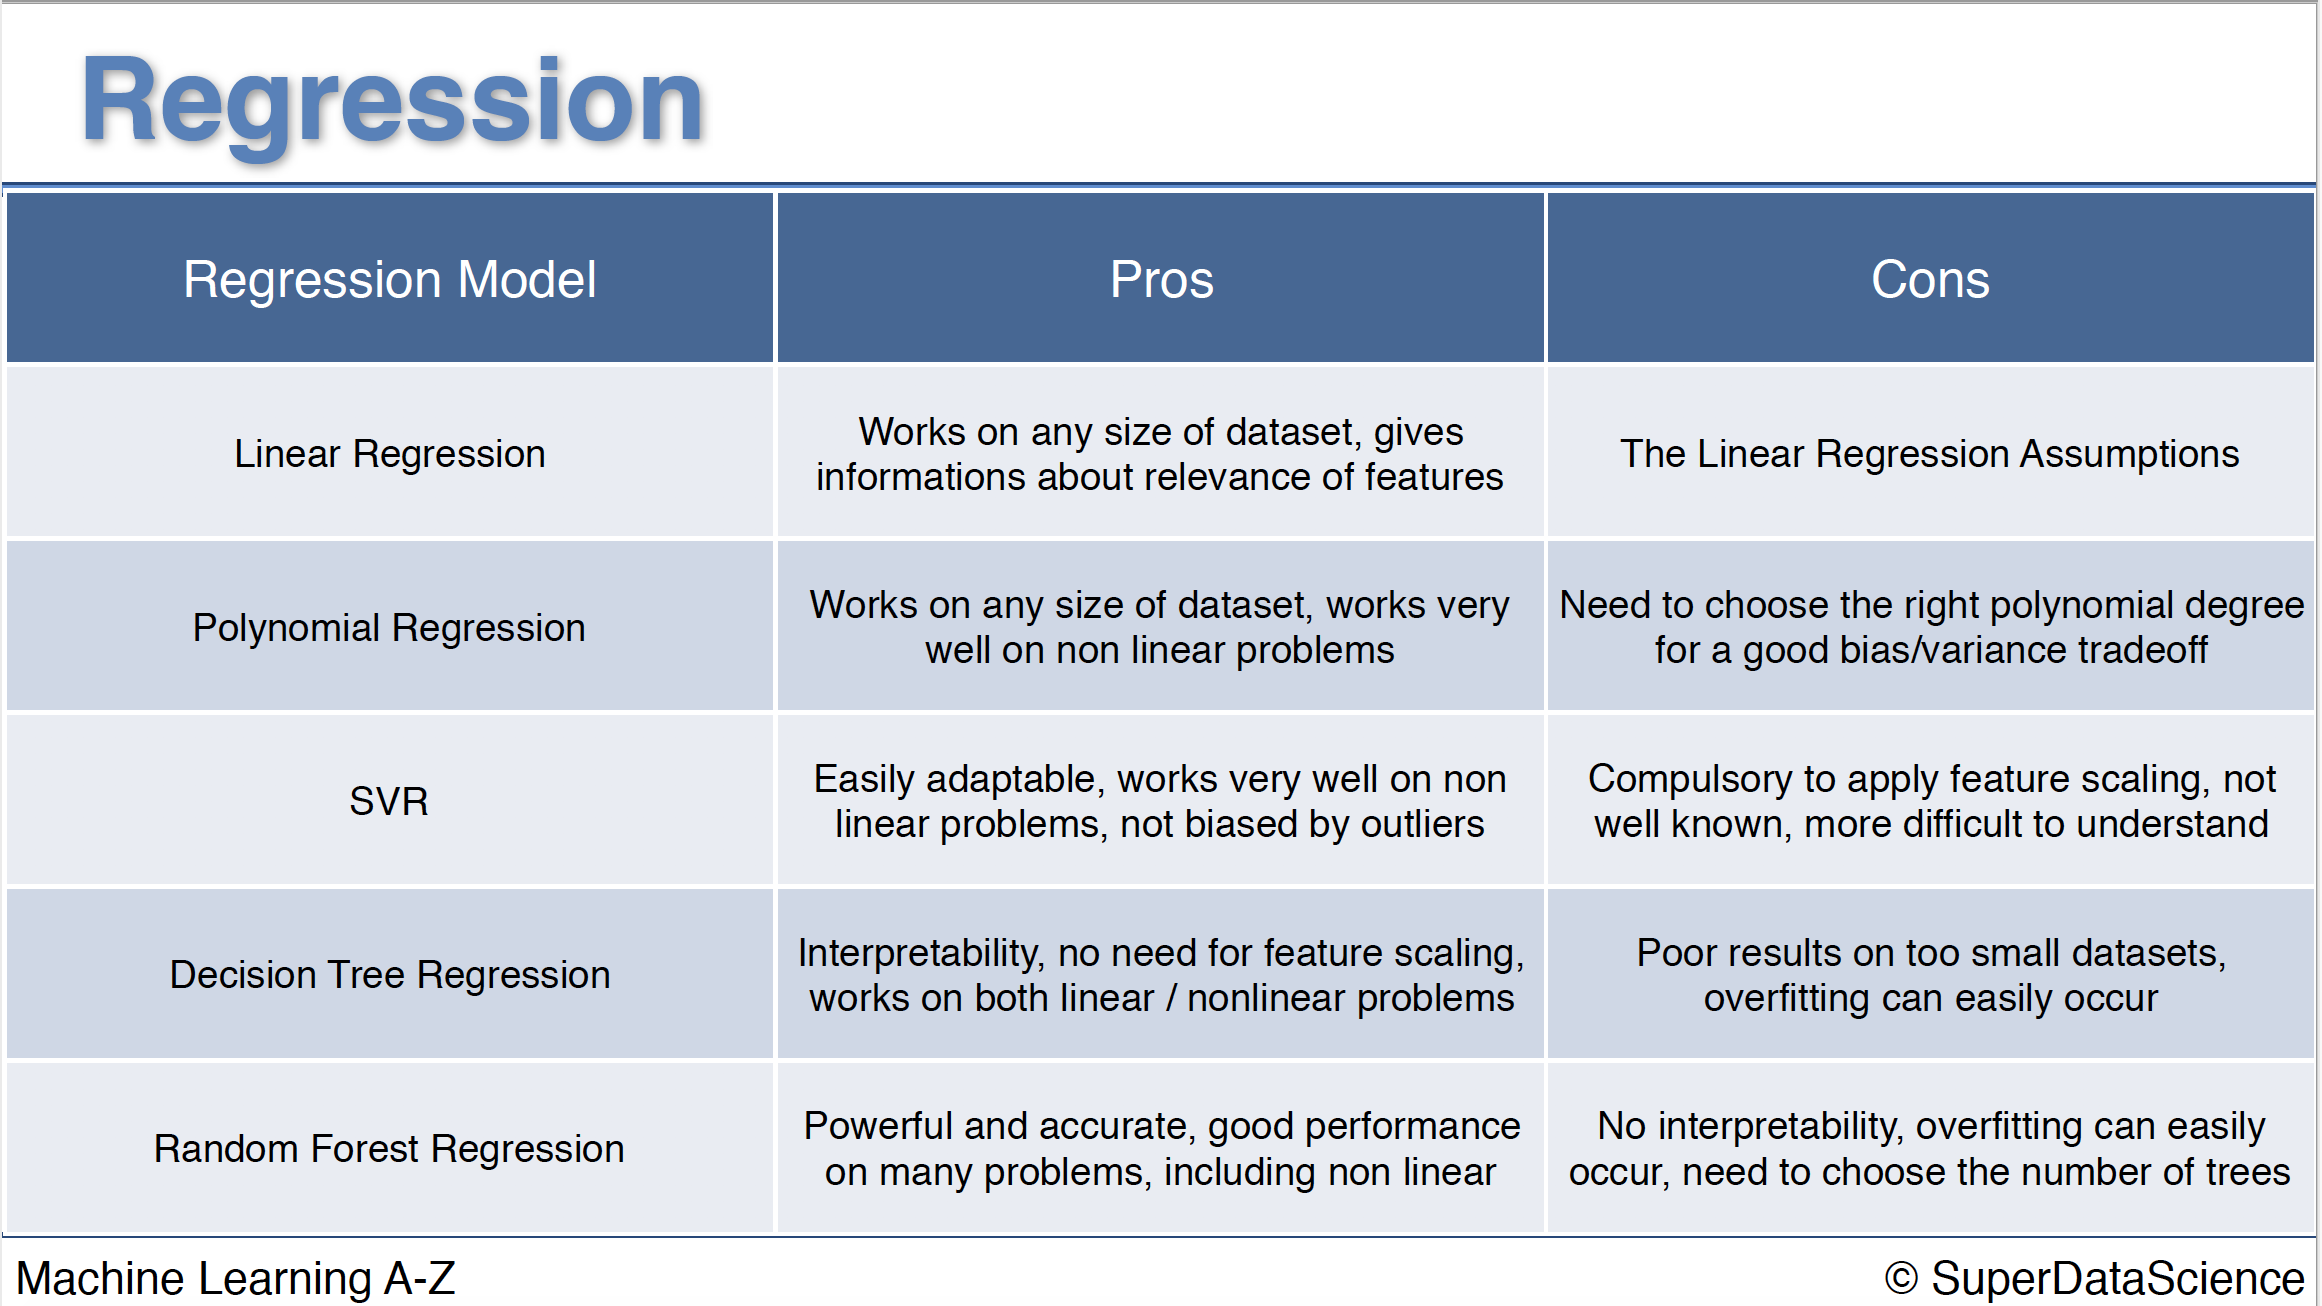

In [2]:
from PIL import Image

Image.open('Regression_comparison.png')

### Problem of overfitting
* you can use regularization to solve the problem 

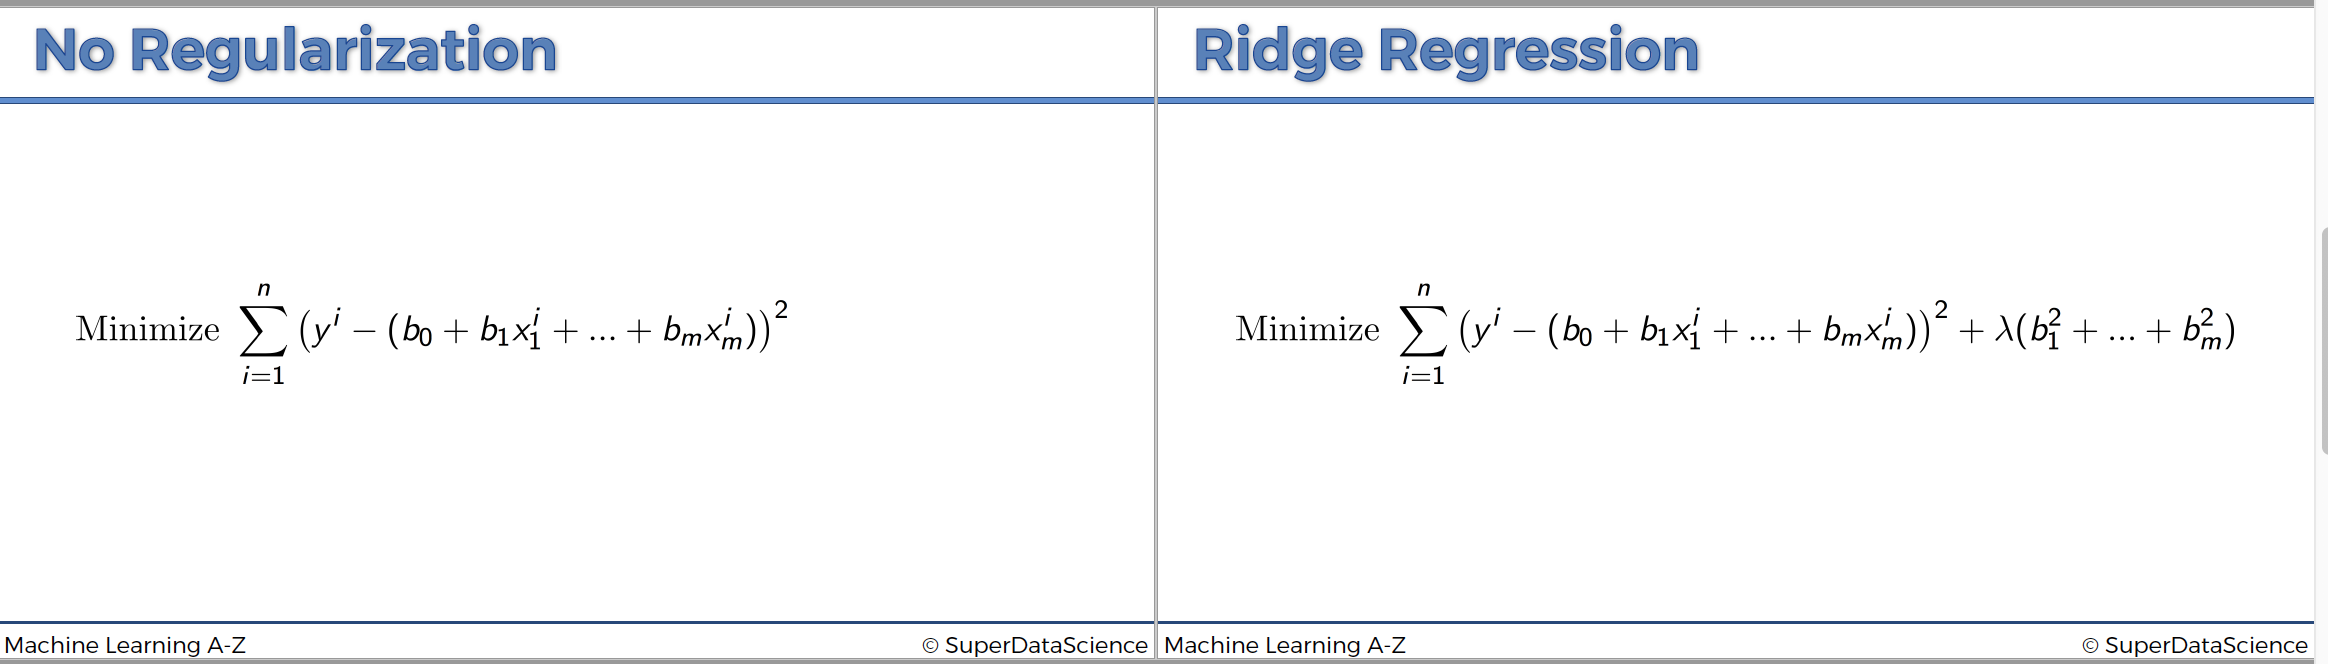

In [3]:
Image.open('No_reg.png')

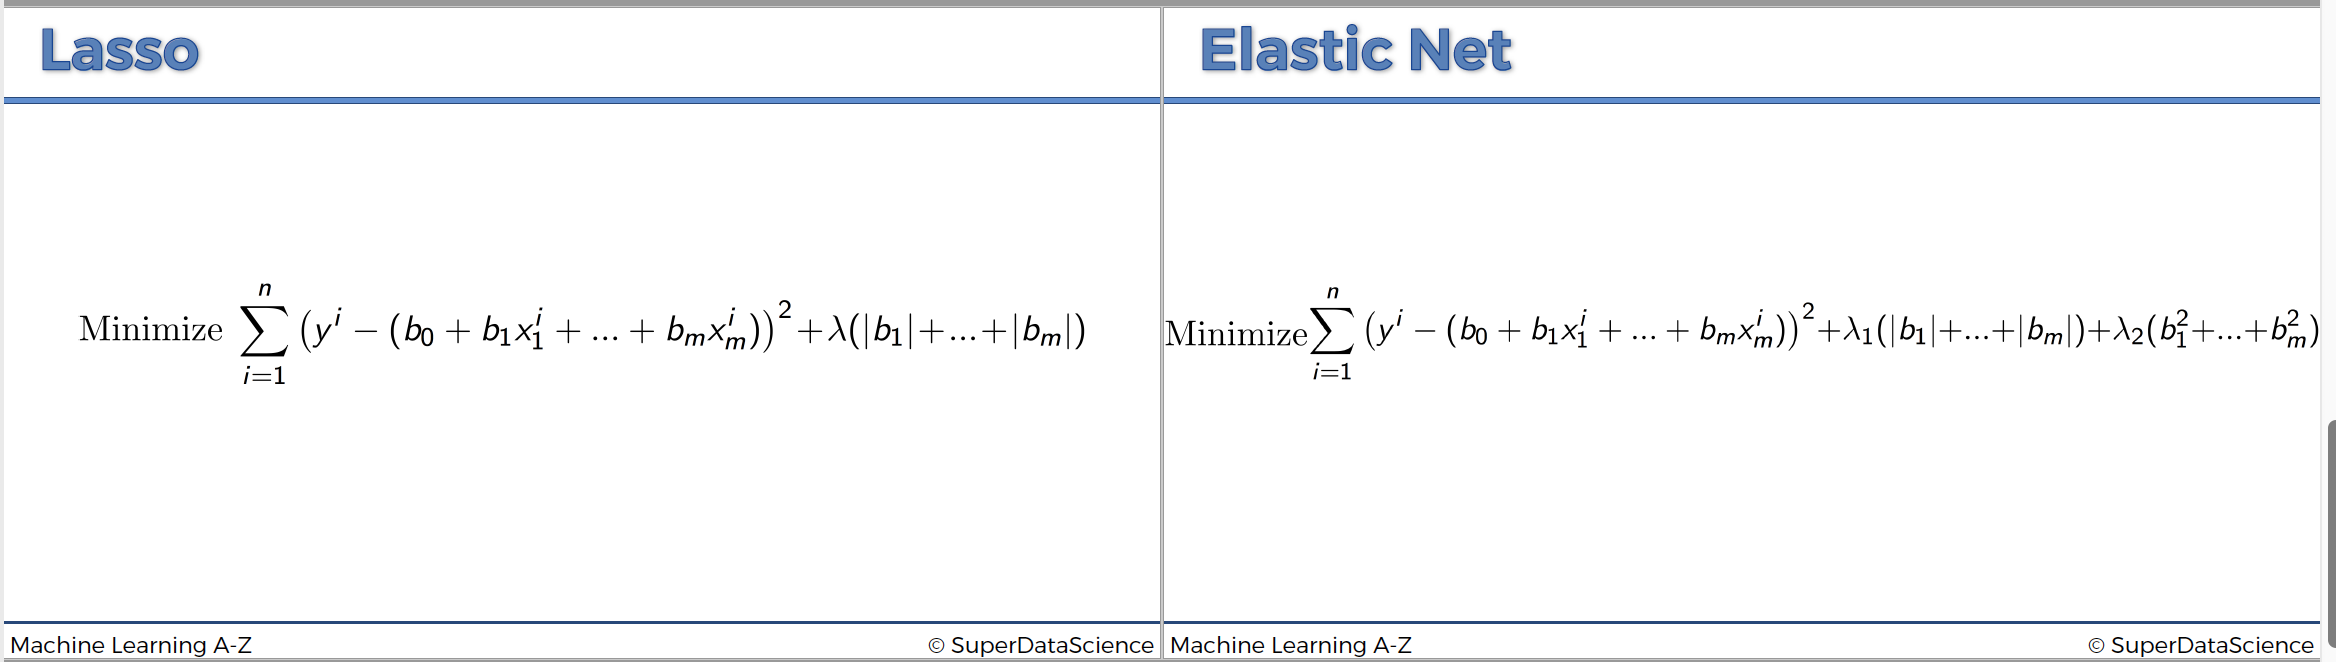

In [4]:
Image.open('Lasso_elastic.png')

## Logistic Regression
* feature scaling is not needed. But you can always adopt feature scaling to slightly improve the accuracy.

## K-Nearest Neighbors
* It is a non-linear classification model

## Supported Vector Machine
* a svm model is with an epsilon insensitive space that doesn't count the error within it. And you want to minimize the error of that insensitive space to the remaining points that are not in the space.
* it is a line and you'll find the distances of two points to the line you choose. Try to maximize the margin (distance) in order to get the best line to separate the dataset. The algorithm is that even if you get rid of the other points, you can still find this line with the two points.
* kernel SVM - some popular non-linear model, in python it's kernal = '', this is to transform the data to a new dimentsion in order to draw a new plane to separate the data:
    1. Gaussian rbf function 
    2. Sigmoid function 
    3. Polynomial function
* non-linear SVM model:

In [ ]:
from sklearn.svm import SVC
# you create a linear classifier
svc = SVC(kernal='linear', random_state=0)


## Naive Bayes 
* why is it Naive? cause the variables should be independent to each others, but normally people will just use it without having them independent
* P(x)? you can remove P(x) -> the probability of having the specific characteristic for that specific data point. You can remove this because it's same in the denominator for the two terms you're comparing
* what about more than two classes? nothing changed. You just calculate more than once
* pros: with less propbability having overfitting problem, and it's a non-linear model

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

## Decision Tree and Random Forest 
* random forest algorithms is used in facial recognition and xbox recognizing your body, hands, and legs.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# this is to change the criteria of spliting the data, rather than using the default method, we used the entropy here
dtree = DecisionTreeClassifier(criterion='entropy', random_state=0)
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

## Classification Model Selection
* cumulative accuracy profile: just like ROC (Receiver Operating Characteristic), but the curve is measuring the accuracy rather than the false positive and false negative rate ratio
* you should choose:
    * Logistic Regression or Naive Bayes when you want to rank your predictions by their probability. For example if you want to rank your customers from the highest probability that they buy a certain product, to the lowest probability. Eventually that allows you to target your marketing campaigns. And of course for this type of business problem, you should use Logistic Regression if your problem is linear, and Naive Bayes if your problem is non linear.

    * SVM when you want to predict to which segment your customers belong to. Segments can be any kind of segments, for example some market segments you identified earlier with clustering.

    * Decision Tree when you want to have clear interpretation of your model results,

    * Random Forest when you are just looking for high performance with less need for interpretation. 

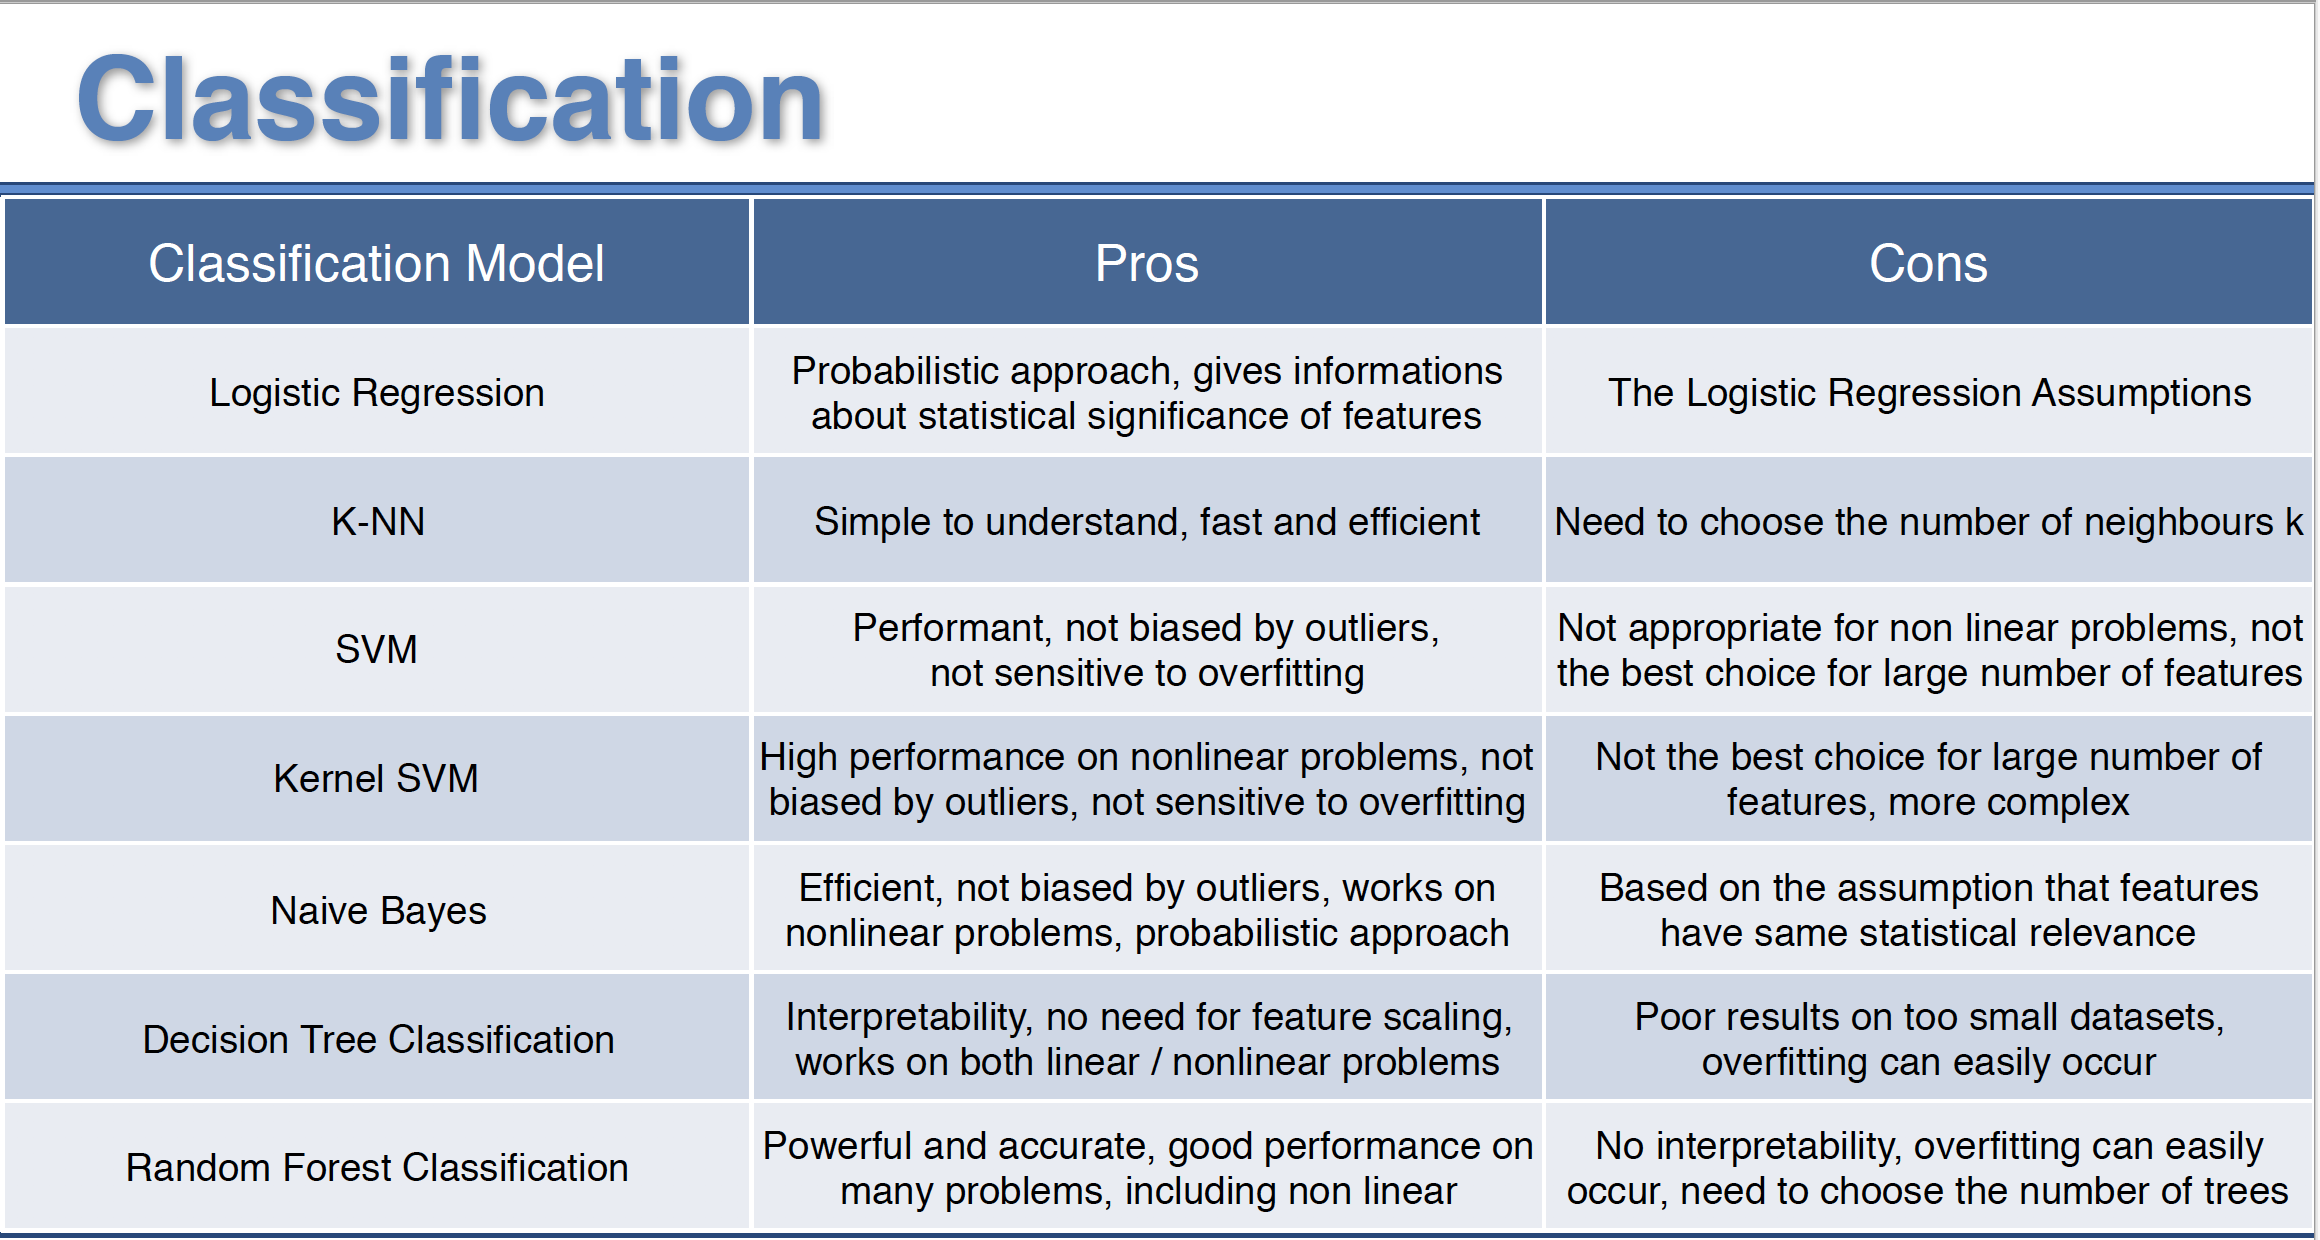

In [5]:
Image.open('class.png')

## K Means Clustering
* random initialization trap: the starting cental points may influence your final result a lot, so choosing better starting points is crucial. k means++ is an algorithms to help solve this problem.
* how to choose the number of clusters: within-cluster sum of square (WCSS). The WCSS will constantly drop as you increase the number of clusters. When your # of cluster equals to # of data points, WCSS is zero. To find the optimal clusters, use the elbow method, which is to find when the 1st order differentiation flatten out point.

In [ ]:
from sklearn.cluster import KMeans
# remember: since you don't have label for unsupervised data, so all the features will be put into the X, and you will not need to do the train_test_split
# use k-means++ to prevent from random initialization trap

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

# after you find the best # of clusters, you can use that to create a model
kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(X)
# y_kmeans is to save a list of the label that kmeans gives to the data point
# it's the same as kmeans.labels_ (fit_predict == kmeans.labels_)

plt.scatter(X[y_kmeans==0, (column you want to put at X axis)], X[y_kmeans==0, (column you want to put at Y axis)], s=100, c='r', label='Cluster 1')
plt.scatter(X[y_kmeans==1, (column you want to put at X axis)], X[y_kmeans==1, (column you want to put at Y axis)], s=100, c='b', label='Cluster 2')
plt.scatter(X[y_kmeans==2, (column you want to put at X axis)], X[y_kmeans==2, (column you want to put at Y axis)], s=100, c='g', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], label='Centroids')
plt.show()

## Hierarchical Clustering
* Agglomerative HC: first make all the points a centroid, and then merge the nearest two clusters into one. Repeat this process until you have only one cluster. 
* Dendrogram: is a graph (like a reverse tree), the height (y) is the distance of the cluster from each other. Then we can set a dissimilarity threshold (a line to determine when to stop increasing inclusters), below this line, the dissimilarity of the clusters would definitely be lower than this.
* The optimal # of clusters: find the longest distance vertical line without crossing any horizontal line's extension
* Divisive HC:

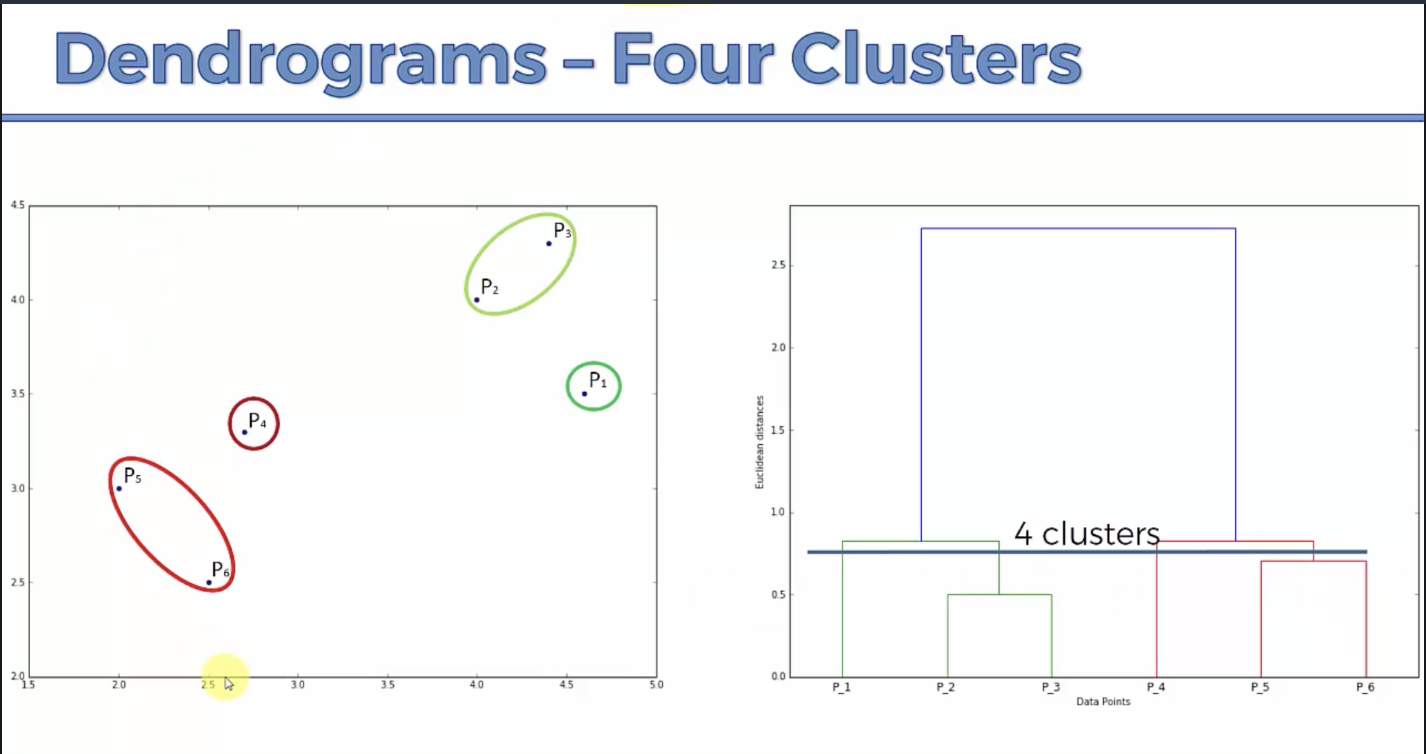

In [6]:
Image.open('dendogram.png')

In [ ]:
import scipy.cluster.hierarchy as sch

# ward is the method of min-variance, which is trying to minimize the variance in each clusterings
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('dendrogram')
# the x label would be the customers because the hierarchy model is to set n = # data points as the clusters at the first step
plt.xlabel('customers')
plt.ylabel('euclidean distance')
plt.show()

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc=hc.fit_predict(X)
plt.scatter(X[y_hc==0, (column you want to put at X axis)], X[y_hc==0, (column you want to put at Y axis)], s=100, c='r', label='Cluster 1')
plt.scatter(X[y_hc==1, (column you want to put at X axis)], X[y_hc==1, (column you want to put at Y axis)], s=100, c='b', label='Cluster 2')
plt.scatter(X[y_hc==2, (column you want to put at X axis)], X[y_hc==2, (column you want to put at Y axis)], s=100, c='g', label='Cluster 3')
plt.show()

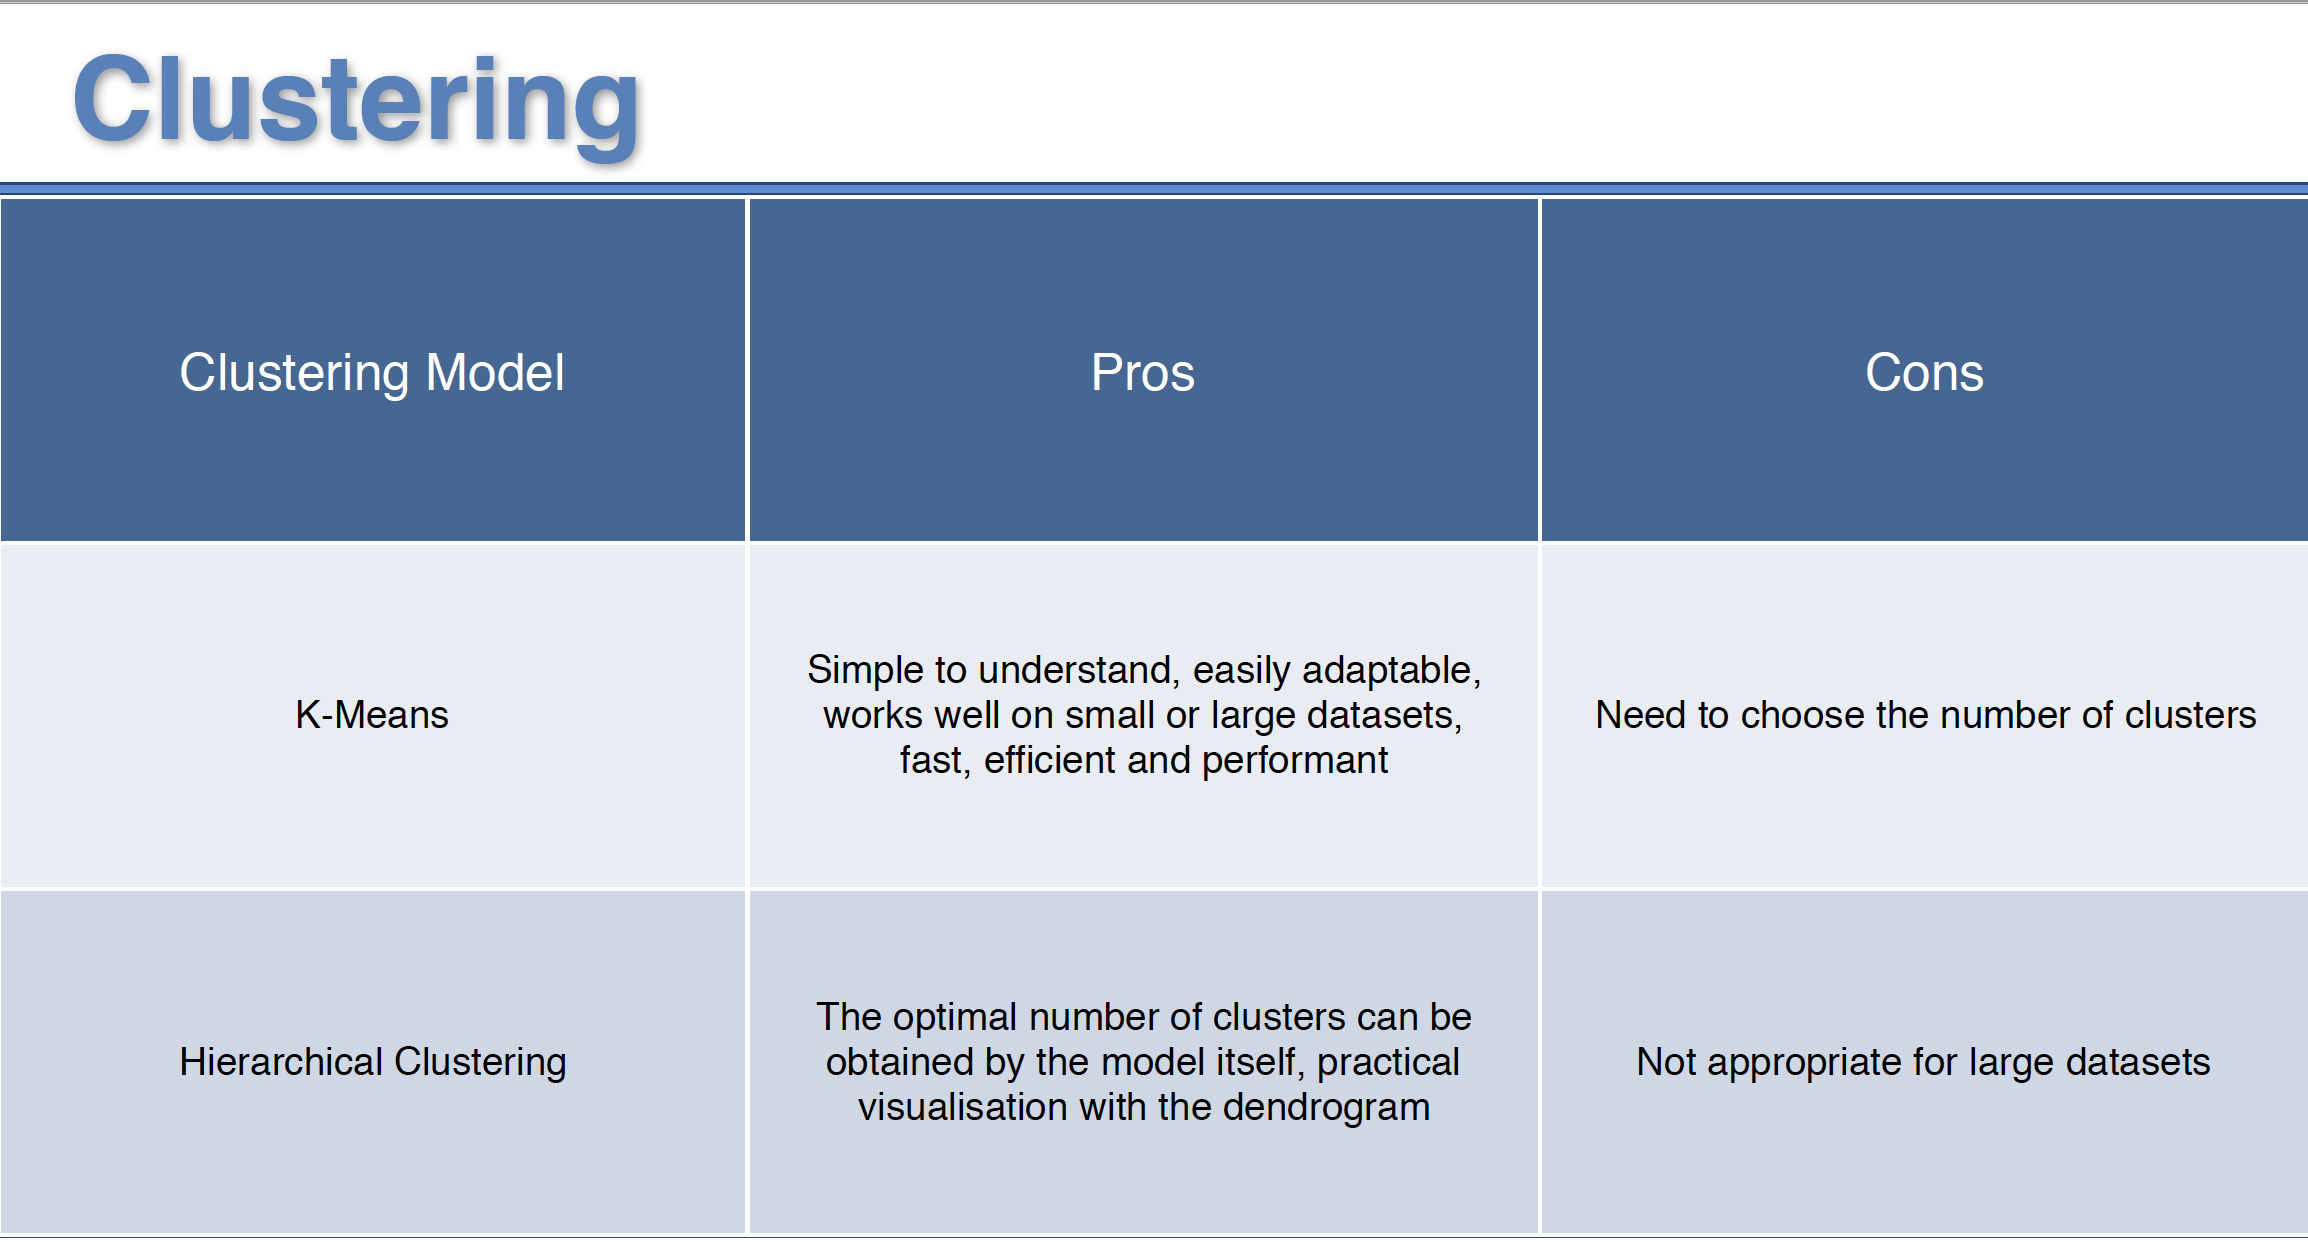

In [7]:
Image.open('clustering.png')

## Apriori
* it is just like a naive-bayes model. Basically you calculate the support of a item (the frequency of this item A happening in the group) and you calculate all the possible subsets combination of one having item B, C, ....and also have item A as the confidence -> it's <b>conditional probability</b>
* then you divide support by confidence to get lift, to see if you're going to recommend the item A to the customer who also have item B, C, and/or....)
* the apriori function can only take a list of transaction with all string data

In [ ]:
from apyori import apriori

# min_support is using experience or common sense to decide; min_confidence is by experience 0.8, but in this case we don't get any rules
# min_lift is decided by experience == 3; min, max length is because we only want to get the result of buy A and recommend B 
rules = apriori(transactions=transaction_lists, min_support=0.003, min_confidence=0.2, min_lift=3, min_length=2, max_length=2)

result = list(rules)

## Eclat
* a simplified apriori
* only have support value: which is calculating the subset of at least two items' frequency in the total transaction. Basically is saying if a combination of two~more items happens frequently, it's likely people bought would also bought...

## Uper Confidence Bound Algorithm
* simple statistic algorithm cost too much to implement, you need to find the optimal distribution while you're exploring the data, rather than conducting all the simulation for all and then choose the best one 

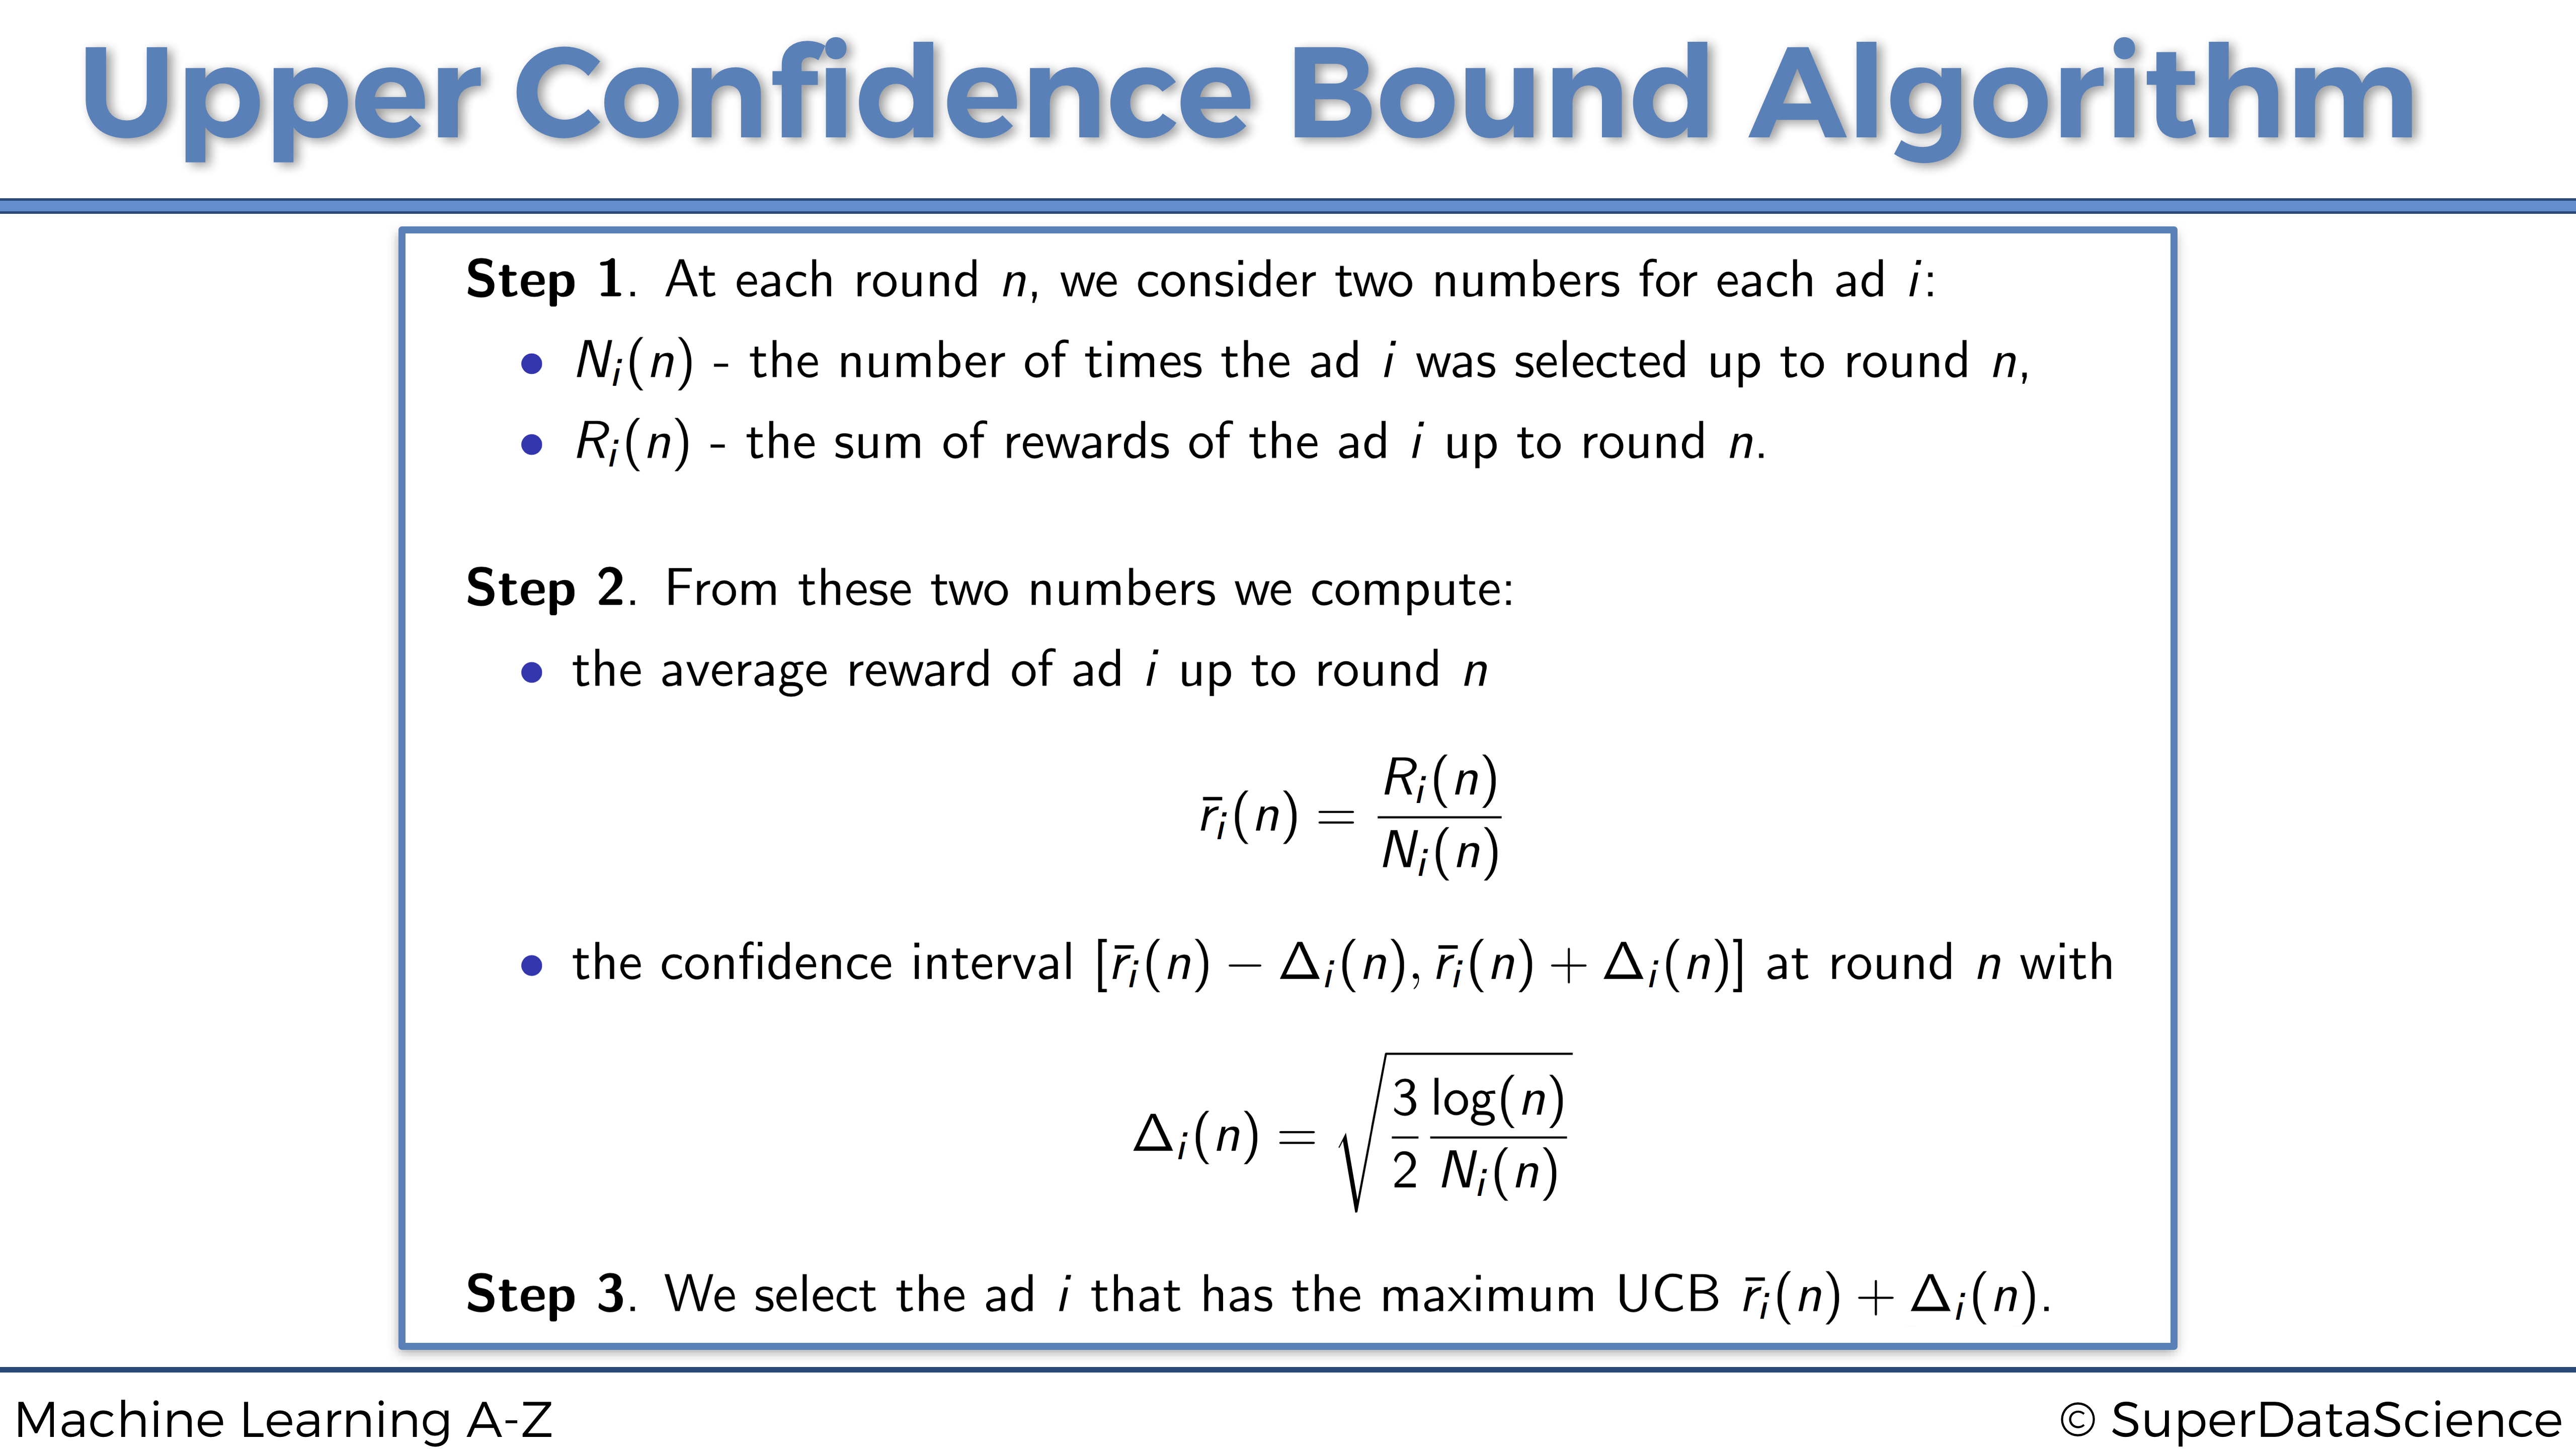

In [8]:
Image.open('UCB_Algorithm_Slide.png')

## Thompson Sampling
* it's not a deterministic algorithm like UCB method, it's all probabilistic. you use the hypothetical distribution to find a value in between and choose the largest value. Then, you use that value, put into the original distribution and get a new input, and you use that to adjust your hypothetical distribution.
* UCB requires update from each round; while Thompson Sampling can accommodate delayed feedback, you can actually wait until you finish 500 trails and then adjust your hypothetical distribution. It saves a lot of computational cost.
* Thompson Sampling has better empirical evidence

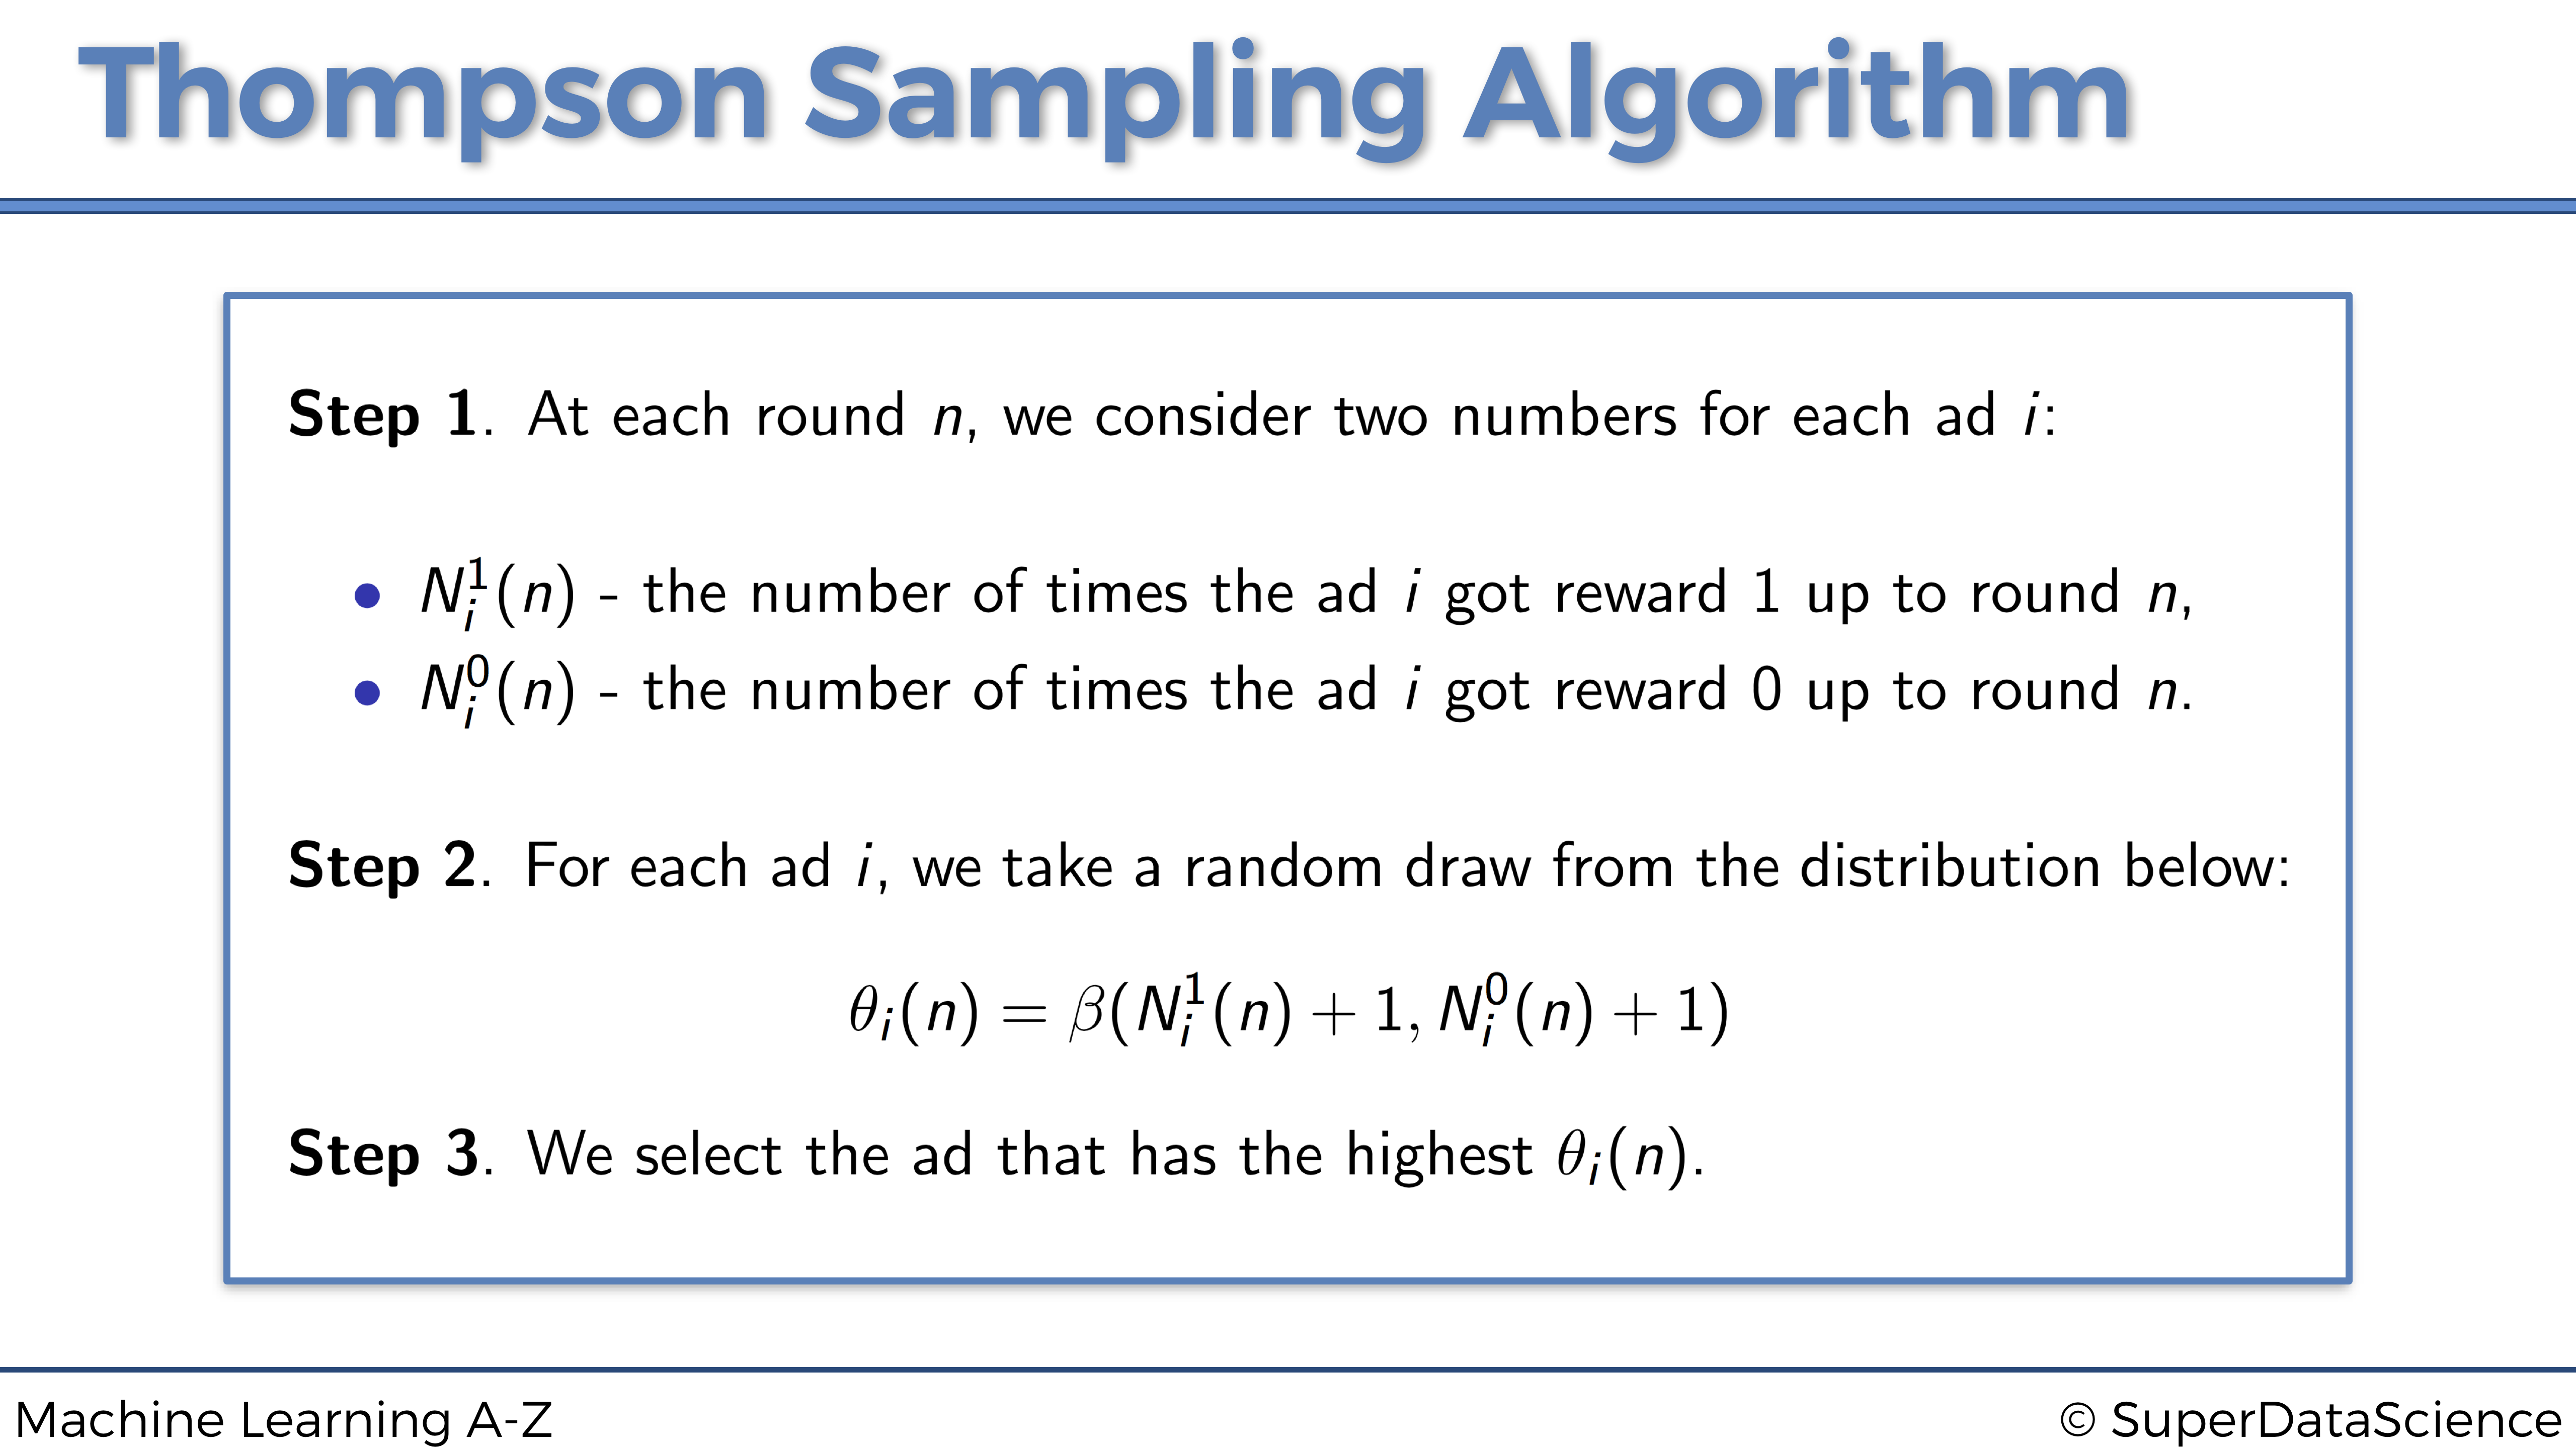

In [9]:
Image.open('Thompson_Sampling_Slide.png')

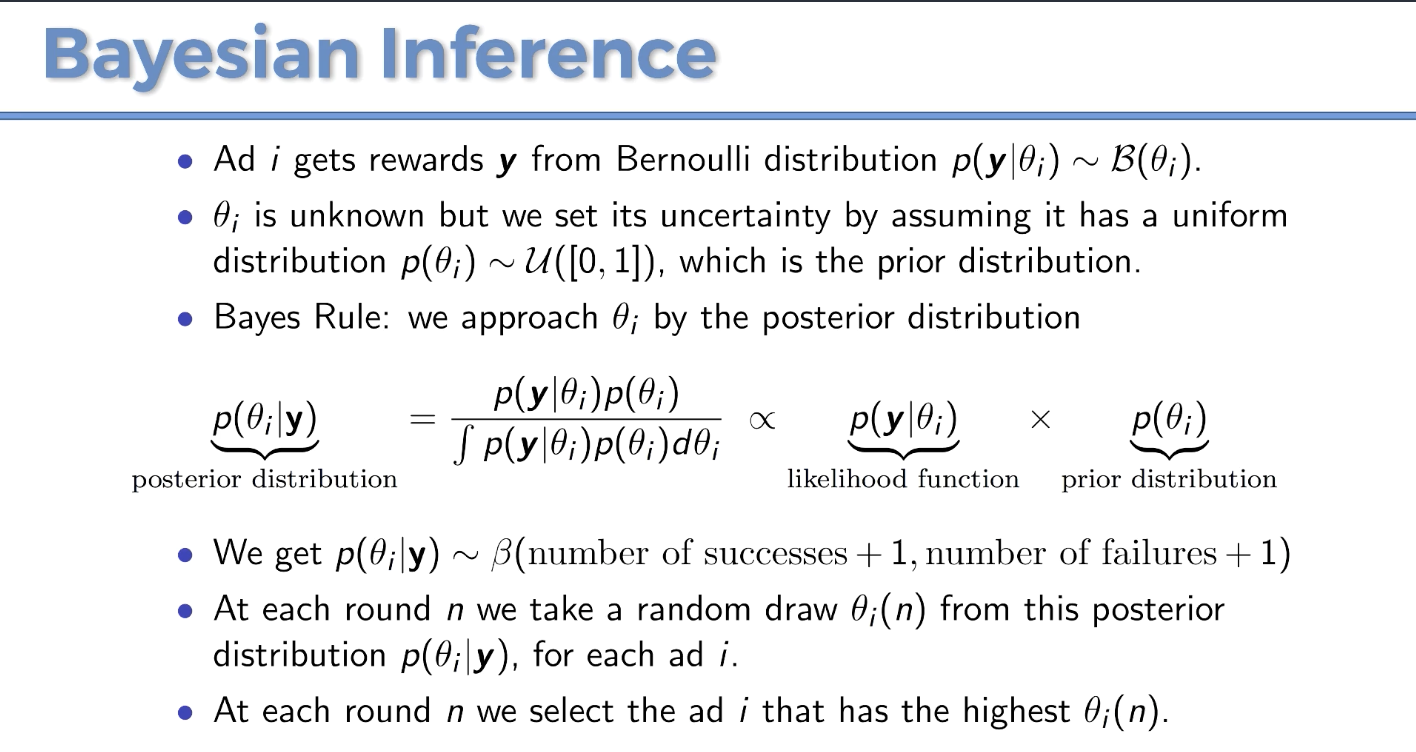

In [10]:
Image.open('Bay.png')